<a href="https://colab.research.google.com/github/Jkhou1000/Project-2/blob/main/Mushroom_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mushroom Edibility Project**

This project will be a showcase and exploration on a dataset from the UCI
namely on mushrooms and the classification of whether or not they are edible or poisonous.

Josh Khoury

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing basic libraries for first part of project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Stack 2/Project 2/CSVS/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
#everything is an object class, matching with the data dictionary from UCI
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
print(f'NaN values:', df.isna().sum().sum())
print(f'Duplicated Values:', df.duplicated().any())
#No NAN or duplicates.

NaN values: 0
Duplicated Values: False


In [ ]:
Hyops = df.dtypes[df.dtypes=='object'].index
for col in Hyops:
  print(f'Column:{col}')
  print(df[col].value_counts(dropna=True))
  print('\n\n')
#There aren't any NaN Values but one of the columns has ? which means it is techincally missing
#All of the mushrooms have the same veil type, even though there are technically two types. this data is unhelpful.

Column:class
e    4208
p    3916
Name: class, dtype: int64



Column:cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64



Column:cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64



Column:cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64



Column:bruises
f    4748
t    3376
Name: bruises, dtype: int64



Column:odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64



Column:gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64



Column:gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64



Column:gill-size
b    5612
n    2512
Name: gill-size, dtype: int64



Column:gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtyp

In [ ]:
df = df.drop(columns=['veil-type'])

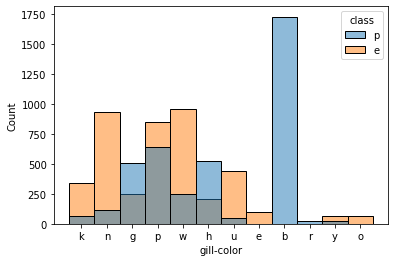

In [ ]:
sns.histplot(data=df, x='gill-color', edgecolor='black',bins='auto', hue='class')
#I have this basic graph to use as a reference for labels, since I have to assign values in the graphs order

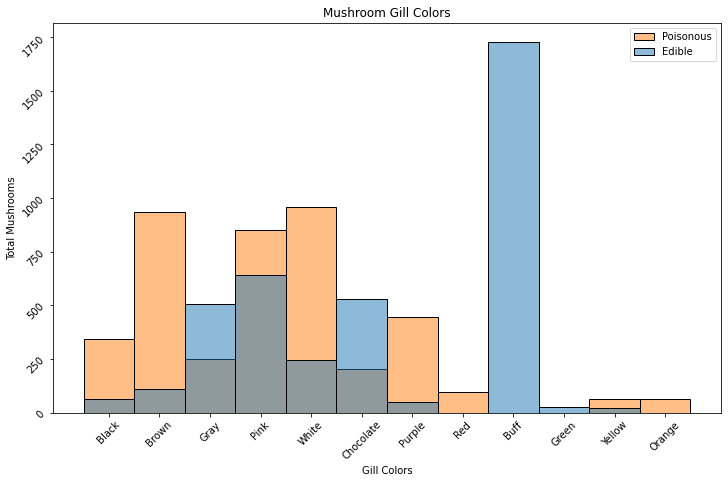

In [ ]:
labels = ['Black', 'Brown', 'Gray', 'Pink', 'White', 'Chocolate', 'Purple', 'Red', 'Buff', 'Green', 'Yellow', 'Orange']
fig, ax = plt.subplots(figsize=(10,6))

#Setting Parameters
plt.tight_layout()
sns.histplot(data=df, x='gill-color', edgecolor='black',bins='auto', hue='class')
plt.ylabel('Total Mushrooms')
plt.xlabel('Gill Colors')
ax.set_xticklabels(labels=labels)
ax.set(title='Mushroom Gill Colors')
ax.tick_params(labelrotation = 45)
ax.legend(labels=['Poisonous', 'Edible'])
#Buff is the most common color for mushroom gils, and all of them are edible. this is good info
#Since the target is the Class (Edible or Poisonous) it best to use them as a hue and compare

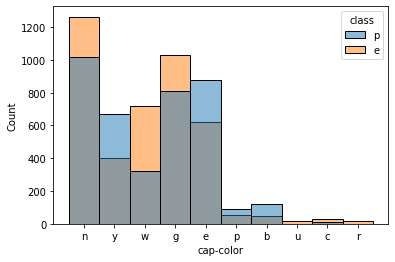

In [ ]:
#Same as above, reference for labels
sns.histplot(data=df, x='cap-color', edgecolor='black',bins='auto', hue='class')

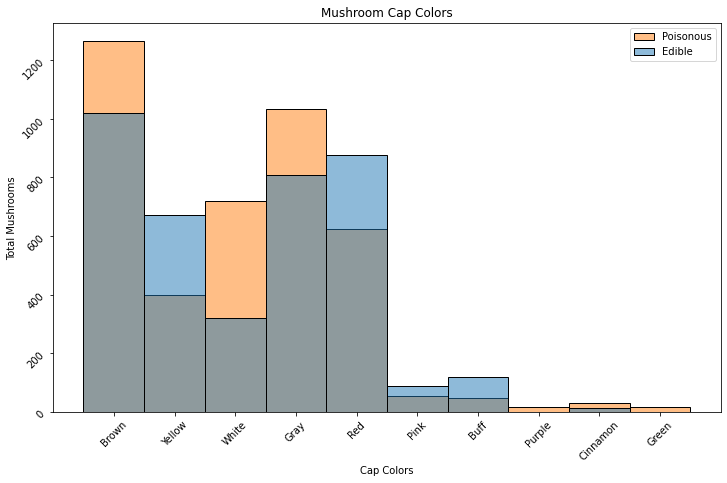

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
labels2 = ['Brown', 'Yellow', 'White',  'Gray', 'Red', 'Pink', 'Buff', 'Purple', 'Cinnamon', 'Green']

#Now to vizualize the Cap colors

plt.tight_layout()
sns.histplot(data=df, x='cap-color', edgecolor='black',bins='auto', hue='class')
plt.ylabel('Total Mushrooms')
plt.xlabel('Cap Colors')
ax.set_xticklabels(labels=labels2)
ax.set(title='Mushroom Cap Colors')
ax.tick_params(labelrotation = 45)
ax.legend(labels=['Poisonous', 'Edible'])
#The few mushrooms with purple cap and green caps are poisonous
#Cap Color isn't good for identifying class in general it seems.

#**Histogram Analysis**

####Based on the Histograms above, we can make several broad observations about the data. For starters, Cap colors by itself is not a great metric for telling if a mushroom is edible, except for a select few which are exclusively Poisonous (The green and purple caps)

####The Gill colors aren't much more precise but notably has an abundance of gills with buff coloring in the samples we have, and all of them are edible, while the few with red and orange ones are exclusively poisonous

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
#I am one hot encoding my dataframe in order to plot out multivariate analyses 
df_ohe = ohe.fit_transform(df)


df_ohe = pd.DataFrame(df_ohe, columns=ohe.get_feature_names_out())
df_ohe[:5]


,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_ohe.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_means = df_ohe.groupby('class_p', as_index=False).mean()
df_caps = df_means.loc[:, df_means.columns.str.startswith('cap')]
df_capshape = df_means.loc[:, df_means.columns.str.contains('cap-shape')]
df_capcolor = df_means.loc[:, df_means.columns.str.contains('cap-color')]

In [ ]:
df_means.head()

,class_p,class_e,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,1.0,0.096008,0.000000,0.379278,0.054183,0.007605,0.462928,0.370722,0.000000,...,0.209125,0.283270,0.252852,0.446768,0.334601,0.057034,0.060837,0.032319,0.022814,0.045627
1,1.0,0.0,0.012257,0.001021,0.397344,0.153218,0.000000,0.436159,0.194076,0.001021,...,0.093973,0.727273,0.165475,0.323800,0.188968,0.151175,0.009193,0.257406,0.069459,0.000000


##Data Preprocessing

THe above code is being used for analysis down below on the two barplots(Not the countplots), since it is incredibly difficult to get the type of anaylsis I want since every single feature is object class, I OneHotEncode everything and convert it into a dataframe. since everything has been converted into a binary

Afterwards I use groupby functions and aggregate it by mean to grab floats that act as a percentage of the data I am evaluating

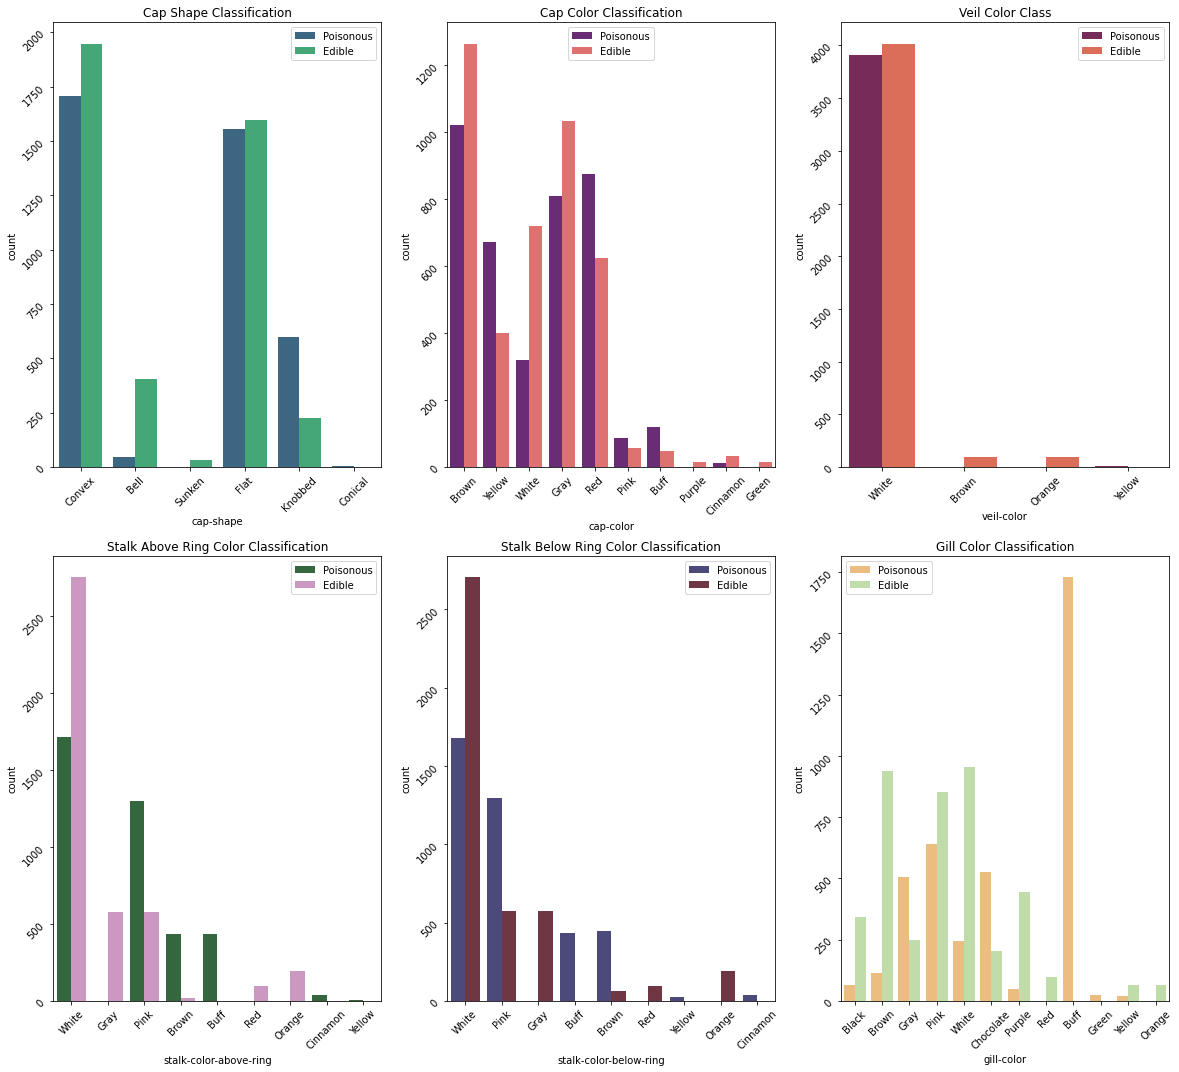

In [63]:
#A countplot to give me basic info on certain features first
fig, axes = plt.subplots(2,3, figsize=(20, 18))
axes = axes.ravel()
#Labels for the new plots are here. Ive made a couple for the histograms above so I don't need to reassign all of them
labels3 = ['Convex', "Bell", "Sunken", 'Flat', 'Knobbed', 'Conical']
labels4 = ['White', 'Brown', 'Orange', "Yellow"]
labels5 = ['White', 'Gray', 'Pink', 'Brown', 'Buff', 'Red', 'Orange', 'Cinnamon', 'Yellow']
labels6 = ['White', 'Pink', 'Gray', 'Buff', 'Brown', 'Red', 'Yellow', 'Orange', 'Cinnamon']
#Countplots for exploring multiple variables edibility
sns.countplot(data=df, x='cap-shape', hue='class', palette='viridis',ax=axes[0]).set_title("Cap Shape Classification")
sns.countplot(data=df, x='cap-color', hue='class', palette='magma', ax=axes[1]).set_title('Cap Color Classification')
sns.countplot(data=df, x='veil-color', hue='class', palette='rocket', ax=axes[2]).set_title('Veil Color Class')
sns.countplot(data=df, x='stalk-color-above-ring', hue='class', palette='cubehelix', ax=axes[3]).set_title('Stalk Above Ring Color Classification')
sns.countplot(data=df, x='stalk-color-below-ring', hue='class', palette='icefire', ax=axes[4]).set_title('Stalk Below Ring Color Classification')
sns.countplot(data=df, x='gill-color', hue='class', palette='Spectral', ax=axes[5]).set_title("Gill Color Classification")

axes[0].set_xticklabels(labels3)
axes[0].tick_params(labelrotation=45)
axes[0].legend(labels=['Poisonous', 'Edible'])
axes[1].set_xticklabels(labels2)
axes[1].tick_params(labelrotation=45)
axes[1].legend(labels=['Poisonous', 'Edible'])
axes[2].set_xticklabels(labels4)
axes[2].tick_params(labelrotation=45)
axes[2].legend(labels=['Poisonous', 'Edible'])
axes[3].set_xticklabels(labels5)
axes[3].tick_params(labelrotation=45)
axes[3].legend(labels=['Poisonous', 'Edible'], loc='upper right')
axes[4].set_xticklabels(labels6)
axes[4].tick_params(labelrotation=45)
axes[4].legend(labels=['Poisonous', 'Edible'], loc='upper right')
axes[5].set_xticklabels(labels)
axes[5].tick_params(labelrotation=45)
axes[5].legend(labels=['Poisonous', 'Edible'])

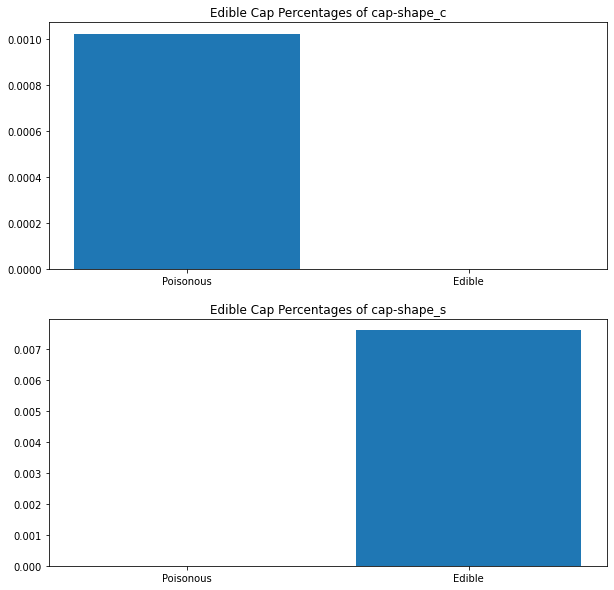

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax = ax.ravel()
#Enumerating through important cap-shapes
for i, col in enumerate(['cap-shape_c', 'cap-shape_s']):
  ax[i].bar(df_means['class_e'], df_means[col])
  ax[i].set_title(f'Edible Cap Percentages of {col}')
  ax[i].set_xticks([0,1])
  ax[i].set_xticklabels({'Edible',"Poisonous"})

#the small percentage of mushrooms with cap-shape_c "Conical" are Poisonous
#The .007 mushrooms with cap shape s "Sunken" are Edible

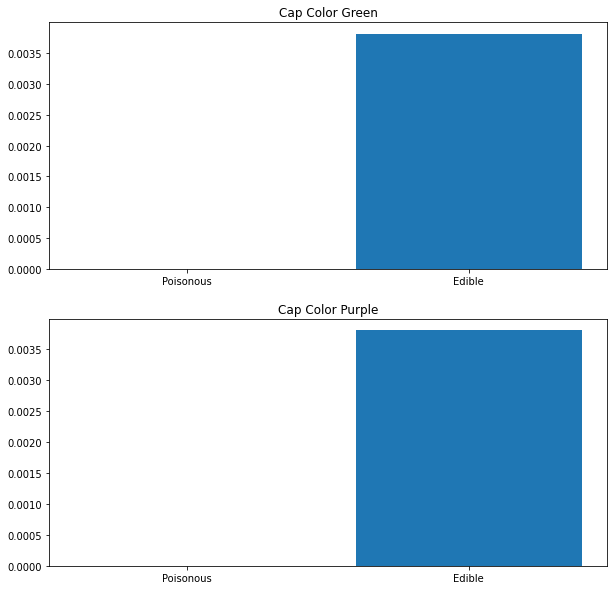

In [ ]:
fig, ax = plt.subplots(2, figsize=(10,10))
ax = ax.ravel()
#Now we look at cap colors
for i, col in enumerate(['cap-color_r', 'cap-color_u']):
  ax[i].bar(df_means['class_e'], df_means[col])
  ax[i].set_xticks([0,1])
  ax[i].set_xticklabels({'Edible', 'Poisonous'})
  ax[0].set_title('Cap Color Green')
  ax[1].set_title('Cap Color Purple')
#From here we can see that all the mushrooms with Green and Purple Cap Colors are Edible

#*Barplot & Countplot Analysis*


In [69]:
#IMporting libraries for modeling and processing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, confusion_matrix


In [68]:
X = df.drop(columns=['class'])
y = df['class']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [ ]:
#Models and Preprocessors
LogReg= LogisticRegression(random_state=42)
KNN = KNeighborsClassifier()
Rand= RandomForestClassifier(random_state=42)
#Reinstating OneHotEncoder down here
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
pca = PCA()